In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo, list_available_datasets #Import ucidatasets
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_iris
from sklearn.model_selection import ValidationCurveDisplay
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

C:\Users\Drewn\AppData\Local\Temp\ipykernel_32364\3410999915.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 
# data  
X = adult.data.features 
y = adult.data.targets 
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables)

y = np.ravel(y)
X = pd.get_dummies(X)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [17]:
# Splitting the data into tst and train
# 80 - 20 Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4)

# Making the Neural Network Classifier
NN = MLPClassifier( solver='lbfgs', max_iter=40,tol=1e-8, verbose=True)

# Training the model on the training data and labels
NN.fit(X_train, y_train)

# Testing the model i.e. predicting the labels of the test data.
y_pred = NN.predict(X_test)

# Evaluating the results of the model
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

# Printing the Results
print("Accuracy for Neural Network is:",accuracy)
print("Confusion Matrix")
print(confusion_mat)

Accuracy for Neural Network is: 24.98464478263837
Confusion Matrix
[[   0 7499    0    0]
 [   0 3661    0    0]
 [   2 2302    0    0]
 [   4 1185    0    0]]


c:\Users\Drewn\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       <=50K       0.00      0.00      0.00      7499
      <=50K.       0.25      1.00      0.40      3661
        >50K       0.00      0.00      0.00      2304
       >50K.       0.00      0.00      0.00      1189

    accuracy                           0.25     14653
   macro avg       0.06      0.25      0.10     14653
weighted avg       0.06      0.25      0.10     14653



c:\Users\Drewn\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Drewn\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Drewn\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<module 'matplotlib.pyplot' from 'C:\\Users\\Drewn\\AppData\\Roaming\\Python\\Python311\\site-packages\\matplotlib\\pyplot.py'>

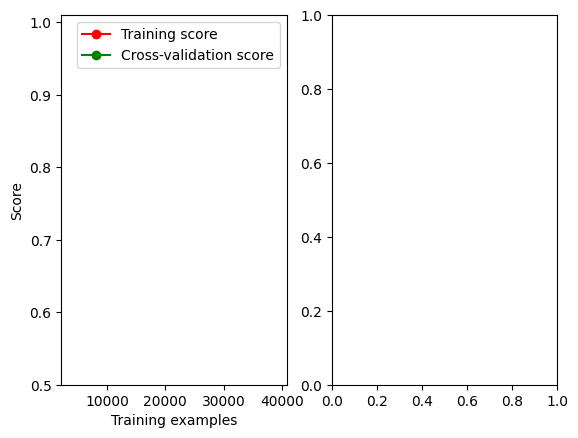

In [19]:
def plot_learning_curve(estimator, X, y, ax=None, ylim=(0.5, 1.01), cv=None, n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5)):

    train_sizes, train_scores, test_scores = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
              
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    ax.legend(loc="best")

    return plt

fig, (ax1, ax2) = plt.subplots(1, 2)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(NN, X, y, ax = ax1, cv=cv, train_sizes=np.linspace(.1, 1.0, 5))